In [42]:
import os
import numpy as np
import nibabel as nib

from matplotlib import pyplot as plt
import matplotlib.colors as colors

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [3]:
dwi_file = nib.streamlines.load(
    "../subjects/ismrm_basic/marked_fibers/2019-11-10-17:12:54/marked.trk")

In [4]:
tractogram = dwi_file.tractogram

In [5]:
mean_curvatures = np.zeros(len(tractogram))
max_curvatures = np.zeros(len(tractogram))
log_prob_sums = np.zeros(len(tractogram))
lengths = np.array([len(t) for t in tractogram])

In [6]:
for i, tract in enumerate(tractogram):
    curvature = tract.data_for_points["k"]
    mean_curvatures[i] = curvature.mean()
    max_curvatures[i] = curvature.max()
    log_prob_sums[i] = tract.data_for_points["log_prob_sum"][0]

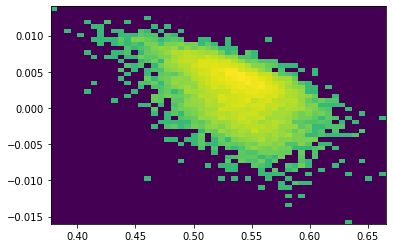

In [49]:
plt.hist2d(mean_curvatures, log_prob_sums, bins=50, density=True,
                norm=colors.SymLogNorm(linthresh=0.01, linscale=1));

In [8]:
pearsonr(mean_curvatures, log_prob_sums)

(-0.49996896989866174, 0.0)

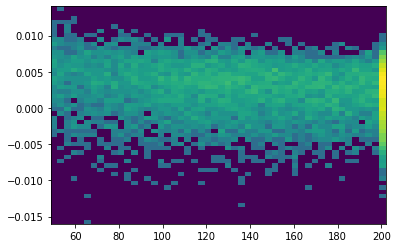

In [10]:
plt.hist2d(lengths, log_prob_sums, bins=50, density=True,
                norm=colors.SymLogNorm(linthresh=0.01, linscale=1));

In [11]:
pearsonr(lengths, log_prob_sums)

(-0.1310921351874419, 1.4061421643108798e-39)

In [50]:
x=[0,1,2]

In [51]:
x.remove(3)

ValueError: list.remove(x): x not in list